<b>

<p>
<center>
<font size="5">
Machine Learning I (DATS 6202 - O10), Spring 2019
</font>
</center>
</p>

<p>
<center>
<font size="4">
Final Project
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Author: Binbin Wu
</font>
</center>
</p>

</b>

# Overview & Introduction

- What is March Madness? 
- The NCAA Division I men’s basketball tournament is a single-elimination tournament of 68 teams that compete in seven rounds for the national championship. The penultimate round is known as the Final Four, when only (you guessed it) four teams are left. 
    
    
    
- How has the tournament changed since 1939? 
- The inaugural tournament had just eight teams, and saw Oregon beat Ohio State 46-33 for the title. In 1951, the field doubled to 16, and kept expanding over the next few decades until 1985, when the modern format of a 64-team tournament began. In 2001, after the Mountain West Conference joined Division I and received an automatic bid, pushing the total teams to 65, a single game was added prior to the first round. In 2011, three more teams were added, and with them, three more games to round out the First Four.



- Why March Madness?
- The odds of it happening are one in 9.2 quintillion: you’re more likely to die an excruciating death by vending machine, become president, win the Mega Millions jackpot or die from incorrectly using products made for right-handed people (if you're a lefty) than fill out a perfect NCAA basketball bracket... Over 60 million Americans fill out a bracket each year, with 1 billion dollars potentially spent on off-book gambling... 


In [1]:
print('The odds of correctly predicting each possible outcome for all 63 games are one in {:,}.'.format(2**63))

The odds of correctly predicting each possible outcome for all 63 games are one in 9,223,372,036,854,775,808.


In [2]:
#import all library
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, log_loss


In [3]:
#import all files
path = '/Users/binbinwu/Desktop/GW 2019 Spring Class/6202 Machine Learning I/Final Project/DataFiles'
datalist=[]
filenames=[]
for filename in os.listdir(path):
    i=0
    if (filename=="TeamSpellings.csv"):
        df=pd.read_csv(path+'/'+filename,encoding = 'unicode_escape')
        datalist.append(df)
        filenames.append(filename)
    else:
        df=pd.read_csv(path+'/'+filename)
        datalist.append(df)
        filenames.append(filename)


In [4]:
filename_dict={filenames[key]: key for key in range (len(filenames))}

In [5]:
filename_dict

{'Teams.csv': 0,
 'TeamConferences.csv': 1,
 'Prelim2019_RegularSeasonDetailedResults.csv': 2,
 'NCAATourneySeeds.csv': 3,
 'SecondaryTourneyTeams.csv': 4,
 'NCAATourneySeedRoundSlots.csv': 5,
 'RegularSeasonDetailedResults.csv': 6,
 'RegularSeasonCompactResults.csv': 7,
 'TeamCoaches.csv': 8,
 'Cities.csv': 9,
 'SecondaryTourneyCompactResults.csv': 10,
 'GameCities.csv': 11,
 'TeamSpellings.csv': 12,
 'Seasons.csv': 13,
 'ConferenceTourneyGames.csv': 14,
 'Conferences.csv': 15,
 'NCAATourneySlots.csv': 16,
 'NCAATourneyCompactResults.csv': 17,
 'NCAATourneyDetailedResults.csv': 18}

In [6]:
#RegularSeasonDetailedResults
datalist[6].head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [7]:
#NCAATourneyDetailedResults
datalist[17].head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [8]:
df = datalist[6][datalist[6].Season > 2008]
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
28825,2009,7,1181,80,1342,49,H,0,30,63,...,17,14,19,10,19,4,28,5,5,25
28826,2009,7,1204,65,1222,63,N,0,24,62,...,20,16,27,15,22,9,14,6,2,21
28827,2009,8,1181,97,1204,54,H,0,32,66,...,19,13,21,16,20,6,17,5,6,28
28828,2009,8,1222,76,1342,57,N,0,30,56,...,21,19,24,8,20,8,19,5,3,18
28829,2009,8,1318,73,1237,60,N,0,21,50,...,17,18,26,13,19,7,9,3,4,22


In [9]:
past_trny_teams = list(set(list(datalist[17]['WTeamID'].unique())+list(datalist[17]['LTeamID'].unique())))
len(past_trny_teams)

298

In [10]:
df_cn = datalist[1].merge(datalist[15], on=['ConfAbbrev'])
df_cn.head()

,Season,TeamID,ConfAbbrev,Description
0,1985,1114,a_sun,Atlantic Sun Conference
1,1985,1147,a_sun,Atlantic Sun Conference
2,1985,1204,a_sun,Atlantic Sun Conference
3,1985,1209,a_sun,Atlantic Sun Conference
4,1985,1215,a_sun,Atlantic Sun Conference


In [11]:
df=pd.merge(df, datalist[0], how='left', left_on='WTeamID', right_on='TeamID')
df=pd.merge(df, datalist[0], how='left', left_on='LTeamID', right_on='TeamID',suffixes=('_W', '_L'))

df=pd.merge(df, df_cn, how='left', left_on=['Season', 'TeamID_W'], right_on=['Season','TeamID'])
df=pd.merge(df, df_cn, how='left', left_on=['Season', 'TeamID_L'], right_on=['Season','TeamID'],suffixes=('_W', '_L'))

df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,TeamID_L,TeamName_L,FirstD1Season_L,LastD1Season_L,TeamID_W,ConfAbbrev_W,Description_W,TeamID_L,ConfAbbrev_L,Description_L
0,2009,7,1181,80,1342,49,H,0,30,63,...,1342,Presbyterian,2008,2019,1181,acc,Atlantic Coast Conference,1342,big_south,Big South Conference
1,2009,7,1204,65,1222,63,N,0,24,62,...,1222,Houston,1985,2019,1204,southern,Southern Conference,1222,cusa,Conference USA
2,2009,8,1181,97,1204,54,H,0,32,66,...,1204,Ga Southern,1985,2019,1181,acc,Atlantic Coast Conference,1204,southern,Southern Conference
3,2009,8,1222,76,1342,57,N,0,30,56,...,1342,Presbyterian,2008,2019,1222,cusa,Conference USA,1342,big_south,Big South Conference
4,2009,8,1318,73,1237,60,N,0,21,50,...,1237,IUPUI,1999,2019,1318,caa,Colonial Athletic Association,1237,summit,Summit League


In [12]:
df['WFGM2'] = df.WFGM - df.WFGM3
df['WFGA2'] = df.WFGA - df.WFGA3
df['LFGM2'] = df.LFGM - df.LFGM3
df['LFGA2'] = df.LFGA - df.LFGA3
df['Margin'] = df.WScore - df.LScore
df['D1_years_W'] = df.LastD1Season_W - df.FirstD1Season_W
df['D1_years_L'] = df.LastD1Season_L - df.FirstD1Season_L

In [13]:
df[['WFGA', 'WFTA', 'WTO', 'WOR', 'WScore', 'WFGM2', 'WFGM3', 'WFGM', 'WFTM', 'WDR', 'WAst', 'WStl', 'WBlk', 'WPF']].describe()

,WFGA,WFTA,WTO,WOR,WScore,WFGM2,WFGM3,WFGM,WFTM,WDR,WAst,WStl,WBlk,WPF
count,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000
mean,55.156720,22.745321,12.520539,10.714334,75.427052,18.949301,7.113932,26.063233,16.186654,25.935245,14.524748,6.769355,3.900838,17.462455
std,7.474602,8.115692,3.879568,4.089870,11.113402,4.644917,3.091733,4.680935,6.252778,4.871046,4.382933,3.013238,2.452969,4.151869
min,27.000000,0.000000,1.000000,0.000000,34.000000,2.000000,0.000000,10.000000,0.000000,8.000000,1.000000,0.000000,0.000000,3.000000
25%,50.000000,17.000000,10.000000,8.000000,68.000000,16.000000,5.000000,23.000000,12.000000,23.000000,11.000000,5.000000,2.000000,15.000000
50%,55.000000,22.000000,12.000000,10.000000,75.000000,19.000000,7.000000,26.000000,16.000000,26.000000,14.000000,6.000000,4.000000,17.000000
75%,60.000000,28.000000,15.000000,13.000000,82.000000,22.000000,9.000000,29.000000,20.000000,29.000000,17.000000,9.000000,5.000000,20.000000
max,103.000000,67.000000,31.000000,38.000000,144.000000,48.000000,26.000000,56.000000,47.000000,53.000000,40.000000,26.000000,18.000000,40.000000


In [14]:
df[['LFGA', 'LFTA', 'LTO', 'LOR', 'LScore', 'LFGM2', 'LFGM3', 'LFGM', 'LFTM', 'LDR', 'LAst', 'LStl', 'LBlk', 'LPF']].describe()

,LFGA,LFTA,LTO,LOR,LScore,LFGM2,LFGM3,LFGM,LFTM,LDR,LAst,LStl,LBlk,LPF
count,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000,53216.000000
mean,56.395313,18.268359,13.775124,10.922241,63.476868,16.529653,6.017871,22.547523,12.363951,21.830765,11.257780,5.838413,2.913353,19.729330
std,7.618530,7.147711,4.212682,4.171806,10.991018,4.296839,2.775566,4.383911,5.389009,4.507210,3.680993,2.687332,2.037197,4.525662
min,29.000000,0.000000,0.000000,0.000000,22.000000,2.000000,0.000000,6.000000,0.000000,4.000000,0.000000,0.000000,0.000000,4.000000
25%,51.000000,13.000000,11.000000,8.000000,56.000000,14.000000,4.000000,20.000000,8.000000,19.000000,9.000000,4.000000,1.000000,17.000000
50%,56.000000,18.000000,13.000000,11.000000,63.000000,16.000000,6.000000,22.000000,12.000000,22.000000,11.000000,6.000000,3.000000,19.000000
75%,61.000000,23.000000,16.000000,14.000000,70.000000,19.000000,8.000000,25.000000,16.000000,25.000000,14.000000,7.000000,4.000000,23.000000
max,106.000000,61.000000,40.000000,36.000000,127.000000,39.000000,20.000000,45.000000,42.000000,49.000000,30.000000,19.000000,17.000000,45.000000


Shooting Efficiency
$$\text{shoot_eff} = \frac{\text{Score}}{\text{FGA} + 0.475\text{FTA}}$$
Scoring Opportunity
$$\text{score_op} = \frac{\text{FGA} + 0.475\text{FTA}}{\text{poss}}$$
Offensive Rating
$$\text{off_rtg} = \frac{\text{Score}}{\text{poss}}  \times 100$$
Defensive Rating
$$\text{def_rtg} = \text{opp_off_rtg}$$
Net Efficiency
$$\text{sos} = \text{off_rtg} - \text{opp_off_rtg}$$
True Shooting Percentage
$$\text{ts_pct} = \frac{\text{Score}}{2(\text{FGA} + 0.475\text{FTA})} \times 100$$
Effective Field Goal Percentage
$$\text{efg_pct} = \frac{\text{FGM2} + 1.5\text{FGM3}}{\text{FGA}}$$
Offensive Rebound Percentage
$$\text{orb_pct} =  \frac{\text{OR}}{\text{OR} + \text{opp_DR}}$$
Defensive Rebound Percentage
$$\text{drb_pct} =  \frac{\text{DR}}{\text{DR} + \text{opp_OR}}$$
Rebound Percentage
$$\text{reb_pct} =  \frac{\text{orb_pct} + \text{drb_pct}}{2}$$
Turnovers per Possession
$$\text{to_poss} = \frac{\text{TO}}{\text{poss}}$$
Free Throw Rate
$$\text{ft_rate} = \frac{\text{FTM}}{\text{FGA}}$$
Team Impact Estimate
$$\text{IE_numerator} = \text{Score} + \text{FGM} + \text{FTM} - \text{FGA} - \text{FTA} + \text{DR} + 0.5\text{OR} + \text{Ast} + \text{Stl} + 0.5\text{Blk} - \text{PF} - \text{TO}$$
$$\text{IE} = \frac{\text{IE_numerator}}{\text{IE_numerator} + \text{opp_IE_numerator}}$$
Assist Ratio
$$\text{ast_rtio} = \frac{\text{Ast}}{\text{FGA} + 0.475\text{FTA} + \text{TO} + \text{Ast}} \times 100$$
Block Percentage
$$\text{blk_pct} = \frac{\text{Blk}}{\text{opp_FGA2}} \times 100$$
Steal Percentage
$$\text{stl_pct} = \frac{\text{Stl}}{\text{opp_poss}} \times 100$$
3-Point Attempt Percentage
$$\text{3pta_pct} = \frac{\text{FGA3}}{\text{FGA}} \times 100$$

In [15]:
# Winner stats related to offensive efficiency:
df['Wposs'] = df.apply(lambda row: row.WFGA + 0.475 * row.WFTA + row.WTO - row.WOR, axis=1)
df['Wshoot_eff'] = df.apply(lambda row: row.WScore / (row.WFGA + 0.475 * row.WFTA), axis=1)
df['Wscore_op'] = df.apply(lambda row: (row.WFGA + 0.475 * row.WFTA) / row.Wposs, axis=1)
df['Woff_rtg'] = df.apply(lambda row: row.WScore/row.Wposs*100, axis=1)

# Loser stats related to offensive efficiency:
df['Lposs'] = df.apply(lambda row: row.LFGA + 0.475 * row.LFTA + row.LTO - row.LOR, axis=1)
df['Lshoot_eff'] = df.apply(lambda row: row.LScore / (row.LFGA + 0.475 * row.LFTA), axis=1)
df['Lscore_op'] = df.apply(lambda row: (row.LFGA + 0.475 * row.LFTA) / row.Lposs, axis=1)
df['Loff_rtg'] = df.apply(lambda row: row.LScore/row.Lposs*100, axis=1)

# Defensive and net efficiency:
df['Wdef_rtg'] = df.apply(lambda row: row.Loff_rtg, axis=1)
df['Wsos'] = df.apply(lambda row: row.Woff_rtg - row.Loff_rtg, axis=1)
df['Ldef_rtg'] = df.apply(lambda row: row.Woff_rtg, axis=1)
df['Lsos'] = df.apply(lambda row: row.Loff_rtg - row.Woff_rtg, axis=1)

# Impact Estimate - 
# First calculate the teams' overall statistical contribution (the numerator):
Wie = df.apply(lambda row: row.WScore + row.WFGM + row.WFTM - row.WFGA - row.WFTA + row.WDR + (0.5 * row.WOR) + row.WAst + row.WStl + (0.5 * row.WBlk) - row.WPF - row.WTO, axis=1)
Lie = df.apply(lambda row: row.LScore + row.LFGM + row.LFTM - row.LFGA - row.LFTA + row.LDR + (0.5 * row.LOR) + row.LAst + row.LStl + (0.5 * row.LBlk) - row.LPF - row.LTO, axis=1)

# Then divide by the total game statistics (the denominator):
df['Wie'] = Wie / (Wie + Lie) * 100
df['Lie'] = Lie / (Lie + Wie) * 100

# Other winner stats:
df['Wts_pct'] = df.apply(lambda row: row.WScore / (2 * (row.WFGA + 0.475 * row.WFTA)) * 100, axis=1)
df['Wefg_pct'] = df.apply(lambda row: (row.WFGM2 + 1.5 * row.WFGM3) / row.WFGA, axis=1)
df['Worb_pct'] = df.apply(lambda row: row.WOR / (row.WOR + row.LDR), axis=1)
df['Wdrb_pct'] = df.apply(lambda row: row.WDR / (row.WDR + row.LOR), axis=1)
df['Wreb_pct'] = df.apply(lambda row: (row.Worb_pct + row.Wdrb_pct) / 2, axis=1)
df['Wto_poss'] = df.apply(lambda row: row.WTO / row.Wposs, axis=1)
df['Wft_rate'] = df.apply(lambda row: row.WFTM / row.WFGA, axis=1)
df['Wast_rtio'] = df.apply(lambda row: row.WAst / (row.WFGA + 0.475*row.WFTA + row.WTO + row.WAst) * 100, axis=1)
df['Wblk_pct'] = df.apply(lambda row: row.WBlk / row.LFGA2 * 100, axis=1)
df['Wstl_pct'] = df.apply(lambda row: row.WStl / row.Lposs * 100, axis=1)
df['W3pta_pct'] = df.apply(lambda row: row.WFGA3 / row.WFGA * 100, axis=1)

# Other loser stats:
df['Lts_pct'] = df.apply(lambda row: row.LScore / (2 * (row.LFGA + 0.475 * row.LFTA)) * 100, axis=1)
df['Lefg_pct'] = df.apply(lambda row: (row.LFGM2 + 1.5 * row.LFGM3) / row.LFGA, axis=1)
df['Lorb_pct'] = df.apply(lambda row: row.LOR / (row.LOR + row.WDR), axis=1)
df['Ldrb_pct'] = df.apply(lambda row: row.LDR / (row.LDR + row.WOR), axis=1)
df['Lreb_pct'] = df.apply(lambda row: (row.Lorb_pct + row.Ldrb_pct) / 2, axis=1)
df['Lto_poss'] = df.apply(lambda row: row.LTO / row.Lposs, axis=1)
df['Lft_rate'] = df.apply(lambda row: row.LFTM / row.LFGA, axis=1)
df['Last_rtio'] = df.apply(lambda row: row.LAst / (row.LFGA + 0.475*row.LFTA + row.LTO + row.LAst) * 100, axis=1)
df['Lblk_pct'] = df.apply(lambda row: row.LBlk / row.WFGA2 * 100, axis=1)
df['Lstl_pct'] = df.apply(lambda row: row.LStl / row.Wposs * 100, axis=1)
df['L3pta_pct'] = df.apply(lambda row: row.LFGA3 / row.LFGA * 100, axis=1)

# Calculate weighted factors for winners and losers:
df['Wfour'] = df.apply(lambda row: 0.4*row.Wefg_pct + 0.25*row.Wto_poss + 0.2*row.Worb_pct + 0.15*row.Wft_rate, axis=1)
df['Lfour'] = df.apply(lambda row: 0.4*row.Lefg_pct + 0.25*row.Lto_poss + 0.2*row.Lorb_pct + 0.15*row.Lft_rate, axis=1)

In [16]:
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,Ldrb_pct,Lreb_pct,Lto_poss,Lft_rate,Last_rtio,Lblk_pct,Lstl_pct,L3pta_pct,Wfour,Lfour
0,2009,7,1181,80,1342,49,H,0,30,63,...,0.575758,0.412879,0.349891,0.264151,4.254188,9.615385,6.251954,32.075472,0.390970,0.309171
1,2009,7,1204,65,1222,63,N,0,24,62,...,0.536585,0.451220,0.203414,0.280702,9.695664,4.166667,8.807339,35.087719,0.358738,0.331042
2,2009,8,1181,97,1204,54,H,0,32,66,...,0.465116,0.389421,0.226742,0.203125,6.187162,12.765957,6.470398,29.687500,0.417564,0.278024
3,2009,8,1222,76,1342,57,N,0,30,56,...,0.714286,0.510989,0.304487,0.475000,10.204082,7.317073,7.797271,52.500000,0.354731,0.398910
4,2009,8,1318,73,1237,60,N,0,21,50,...,0.633333,0.502381,0.151643,0.352941,8.821676,14.285714,5.054760,33.333333,0.375032,0.329843


In [17]:
#revmove duplicated columns
df=df.loc[:,~df.columns.duplicated()]

In [18]:
# Initialize dataframe to hold season averages:
df_avgs = pd.DataFrame()

# Get and save number of wins and losses:
df_avgs['n_wins'] = df['TeamID_W'].groupby([df.Season, df.TeamID_W, df.TeamName_W, df.Description_W]).count()
df_avgs['n_loss'] = df['TeamID_L'].groupby([df.Season, df.TeamID_L, df.TeamName_L, df.Description_L]).count()

# df_avgs['n_loss'].fillna(0, inplace=True)

# Calculate win percentages:
df_avgs['win_pct'] = df_avgs['n_wins'] / (df_avgs['n_wins'] + df_avgs['n_loss'])

In [19]:
# Calculate averages for games won:
df_avgs['Wshoot_eff'] = df['Wshoot_eff'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Wscore_op'] = df['Wscore_op'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Woff_rtg'] = df['Woff_rtg'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Wdef_rtg'] = df['Wdef_rtg'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Wsos'] = df['Wsos'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Wts_pct'] = df['Wts_pct'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Wefg_pct'] = df['Wefg_pct'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Worb_pct'] = df['Worb_pct'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Wdrb_pct'] = df['Wdrb_pct'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Wreb_pct'] = df['Wreb_pct'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Wto_poss'] = df['Wto_poss'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Wft_rate'] = df['Wft_rate'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Wie'] = df['Wie'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Wast_rtio'] = df['Wast_rtio'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Wblk_pct'] = df['Wblk_pct'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Wstl_pct'] = df['Wstl_pct'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['W3pta_pct'] = df['W3pta_pct'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Wfour'] = df['Wfour'].groupby([df['Season'], df['WTeamID']]).mean()

# Calculate averages for games lost:
df_avgs['Lshoot_eff'] = df['Lshoot_eff'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Lscore_op'] = df['Lscore_op'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Loff_rtg'] = df['Loff_rtg'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Ldef_rtg'] = df['Ldef_rtg'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Lsos'] = df['Lsos'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Lts_pct'] = df['Lts_pct'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Lefg_pct'] = df['Lefg_pct'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Lorb_pct'] = df['Lorb_pct'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Ldrb_pct'] = df['Ldrb_pct'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Lreb_pct'] = df['Lreb_pct'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Lto_poss'] = df['Lto_poss'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Lft_rate'] = df['Lft_rate'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Lie'] = df['Lie'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Last_rtio'] = df['Last_rtio'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Lblk_pct'] = df['Lblk_pct'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Lstl_pct'] = df['Lstl_pct'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['L3pta_pct'] = df['L3pta_pct'].groupby([df['Season'], df['WTeamID']]).mean()
df_avgs['Lfour'] = df['Lfour'].groupby([df['Season'], df['WTeamID']]).mean()

In [20]:
# Calculate weighted average using win percentage:
df_avgs['shoot_eff'] = df_avgs['Wshoot_eff'] * df_avgs['win_pct'] + df_avgs['Lshoot_eff'] * (1 - df_avgs['win_pct'])
df_avgs['score_op'] = df_avgs['Wscore_op'] * df_avgs['win_pct'] + df_avgs['Lscore_op'] * (1 - df_avgs['win_pct'])
df_avgs['off_rtg'] = df_avgs['Woff_rtg'] * df_avgs['win_pct'] + df_avgs['Loff_rtg'] * (1 - df_avgs['win_pct'])
df_avgs['def_rtg'] = df_avgs['Wdef_rtg'] * df_avgs['win_pct'] + df_avgs['Ldef_rtg'] * (1 - df_avgs['win_pct'])
df_avgs['sos'] = df_avgs['Wsos'] * df_avgs['win_pct'] + df_avgs['Lsos'] * (1 - df_avgs['win_pct'])
df_avgs['ts_pct'] = df_avgs['Wts_pct'] * df_avgs['win_pct'] + df_avgs['Lts_pct'] * (1 - df_avgs['win_pct'])
df_avgs['efg_pct'] = df_avgs['Wefg_pct'] * df_avgs['win_pct'] + df_avgs['Lefg_pct'] * (1 - df_avgs['win_pct'])
df_avgs['orb_pct'] = df_avgs['Worb_pct'] * df_avgs['win_pct'] + df_avgs['Lorb_pct'] * (1 - df_avgs['win_pct'])
df_avgs['drb_pct'] = df_avgs['Wdrb_pct'] * df_avgs['win_pct'] + df_avgs['Ldrb_pct'] * (1 - df_avgs['win_pct'])
df_avgs['reb_pct'] = df_avgs['Wreb_pct'] * df_avgs['win_pct'] + df_avgs['Lreb_pct'] * (1 - df_avgs['win_pct'])
df_avgs['to_poss'] = df_avgs['Wto_poss'] * df_avgs['win_pct'] + df_avgs['Lto_poss'] * (1 - df_avgs['win_pct'])
df_avgs['ft_rate'] = df_avgs['Wft_rate'] * df_avgs['win_pct'] + df_avgs['Lft_rate'] * (1 - df_avgs['win_pct'])
df_avgs['ie'] = df_avgs['Wie'] * df_avgs['win_pct'] + df_avgs['Lie'] * (1 - df_avgs['win_pct'])
df_avgs['ast_rtio'] = df_avgs['Wast_rtio'] * df_avgs['win_pct'] + df_avgs['Last_rtio'] * (1 - df_avgs['win_pct'])
df_avgs['blk_pct'] = df_avgs['Wblk_pct'] * df_avgs['win_pct'] + df_avgs['Lblk_pct'] * (1 - df_avgs['win_pct'])
df_avgs['stl_pct'] = df_avgs['Wstl_pct'] * df_avgs['win_pct'] + df_avgs['Lstl_pct'] * (1 - df_avgs['win_pct'])
df_avgs['3pta_pct'] = df_avgs['W3pta_pct'] * df_avgs['win_pct'] + df_avgs['L3pta_pct'] * (1 - df_avgs['win_pct'])
df_avgs['four'] = df_avgs['Wfour'] * df_avgs['win_pct'] + df_avgs['Lfour'] * (1 - df_avgs['win_pct'])

df_avgs.reset_index(inplace = True)
#df_avgs = df_avgs.rename(columns={'WTeamID': 'TeamID', 'WTeamName': 'TeamName', 'WConfName': 'ConfName'})
df_avgs.head()

,Season,TeamID_W,TeamName_W,Description_W,n_wins,n_loss,win_pct,Wshoot_eff,Wscore_op,Woff_rtg,...,drb_pct,reb_pct,to_poss,ft_rate,ie,ast_rtio,blk_pct,stl_pct,3pta_pct,four
0,2009,1102,Air Force,Mountain West Conference,8,21.0,0.275862,1.242686,0.923620,114.455328,...,0.668387,0.492259,0.221022,0.276871,38.713434,13.503932,9.384932,11.292628,38.288858,0.344136
1,2009,1103,Akron,Mid-American Conference,22,12.0,0.647059,1.076225,0.992331,106.413878,...,0.664163,0.504396,0.225425,0.290431,56.201138,12.487757,7.055493,11.630895,37.756607,0.358926
2,2009,1104,Alabama,Southeastern Conference,16,14.0,0.533333,1.095082,0.988342,108.022714,...,0.622860,0.501927,0.211250,0.235920,51.041230,12.616907,10.191823,10.224345,29.104569,0.352816
3,2009,1105,Alabama A&M,Southwest Athletic Conference,7,17.0,0.291667,1.059991,0.943322,98.473000,...,0.667538,0.516815,0.244457,0.212320,44.381418,12.621863,7.798641,11.813101,25.447535,0.343054
4,2009,1106,Alabama St,Southwest Athletic Conference,20,9.0,0.689655,1.114374,0.971961,107.667544,...,0.658629,0.501829,0.198745,0.243157,57.491441,13.816262,9.783831,8.895356,29.001093,0.352759


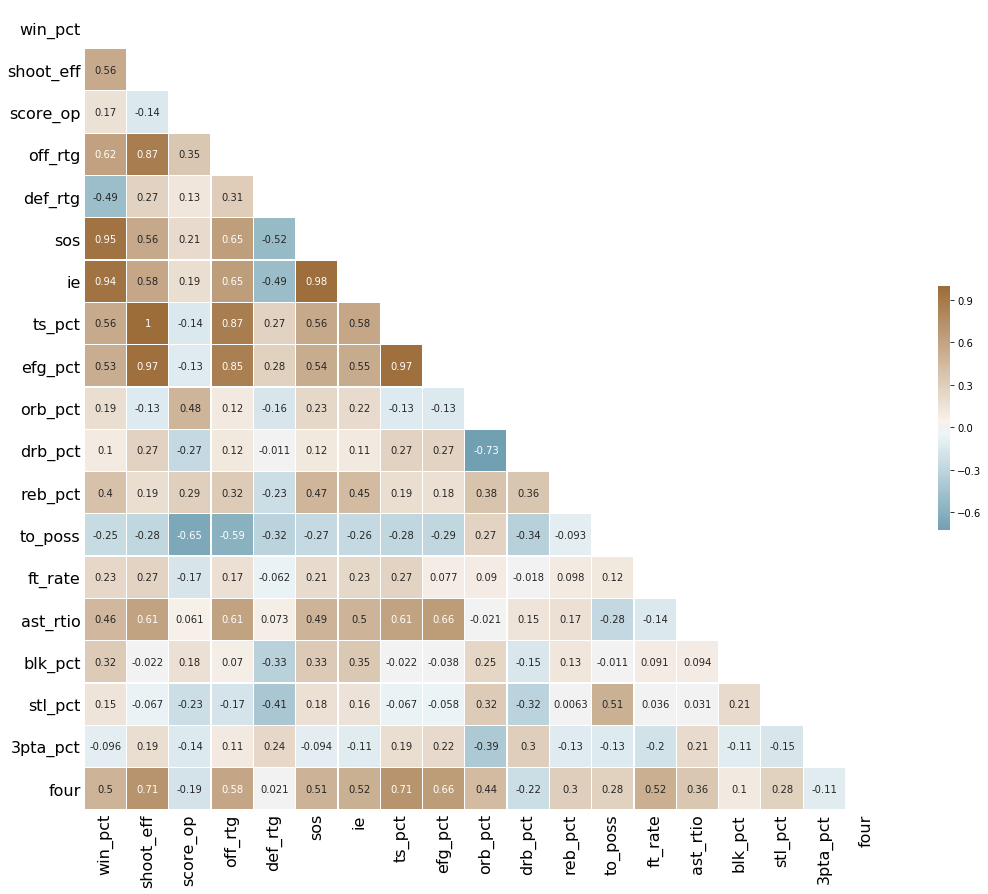

In [21]:
fig = plt.figure(figsize=(18, 18))

# Save the correlation matrix:
matrix = df_avgs[['win_pct', 'shoot_eff', 'score_op', 'off_rtg', 'def_rtg', 'sos', 'ie', 'ts_pct', 'efg_pct', 'orb_pct', 'drb_pct', 'reb_pct', 'to_poss', 'ft_rate', 'ast_rtio', 'blk_pct', 'stl_pct', '3pta_pct', 'four']].corr()

# Create mask for the upper triangle:
mask = np.zeros_like(matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Create a custom diverging colormap:
cmap = sns.diverging_palette(225, 45, as_cmap=True)

sns.heatmap(matrix, mask=mask, cmap=cmap, center=0, annot=True, square=True, linewidths=0.25, cbar_kws={'shrink': 0.25})
plt.tick_params(axis='both', which='both',length=0)
plt.tick_params(axis='both', which='major', labelsize=16);

In [22]:
df_features = df_avgs[['Season', 'TeamID_W', 'shoot_eff', 'score_op', 'off_rtg', 'def_rtg', 'sos', 'ie', 'efg_pct', 'to_poss', 'orb_pct', 'ft_rate', 'reb_pct', 'drb_pct', 'ts_pct', 'ast_rtio', 'blk_pct', 'stl_pct', '3pta_pct', 'four']]
df_features.head()

,Season,TeamID_W,shoot_eff,score_op,off_rtg,def_rtg,sos,ie,efg_pct,to_poss,orb_pct,ft_rate,reb_pct,drb_pct,ts_pct,ast_rtio,blk_pct,stl_pct,3pta_pct,four
0,2009,1102,1.002604,0.949094,94.856582,106.989139,-12.132557,38.713434,0.460309,0.221022,0.316131,0.276871,0.492259,0.668387,50.130196,13.503932,9.384932,11.292628,38.288858,0.344136
1,2009,1103,1.033134,0.956132,98.558247,92.011888,6.546359,56.201138,0.475199,0.225425,0.344629,0.290431,0.504396,0.664163,51.656709,12.487757,7.055493,11.630895,37.756607,0.358926
2,2009,1104,1.010769,0.994962,100.321085,99.220852,1.100233,51.041230,0.471042,0.211250,0.380994,0.235920,0.501927,0.622860,50.538454,12.616907,10.191823,10.224345,29.104569,0.352816
3,2009,1105,0.935006,0.971981,89.797311,94.900658,-5.103347,44.381418,0.442184,0.244457,0.366092,0.212320,0.516815,0.667538,46.750303,12.621863,7.798641,11.813101,25.447535,0.343054
4,2009,1106,1.040863,0.984043,101.698582,94.403184,7.295398,57.491441,0.493983,0.198745,0.345028,0.243157,0.501829,0.658629,52.043132,13.816262,9.783831,8.895356,29.001093,0.352759


In [23]:
#including seeding to feature
datalist[3]['seed'] = datalist[3]['Seed'].apply(lambda x : int(x[1:3]))
df_seeds = datalist[3][['Season', 'TeamID', 'seed']]
df_seeds.head()

,Season,TeamID,seed
0,1985,1207,1
1,1985,1210,2
2,1985,1228,3
3,1985,1260,4
4,1985,1374,5


In [24]:
df_seeds = df_seeds[df_seeds.Season > 2008]
df_features = pd.merge(df_seeds, df_features, how='left', left_on=['Season', 'TeamID'], right_on=['Season', 'TeamID_W'])

df_features['seed'] = pd.Categorical(df_features.seed)
df_dummies = pd.get_dummies(df_features.seed, prefix='seed')
df_features = pd.concat([df_features, df_dummies], axis=1)
df_features.drop(['seed'], inplace=True, axis=1)

In [25]:
df_features.iloc[:,-16:].head()

,seed_1,seed_2,seed_3,seed_4,seed_5,seed_6,seed_7,seed_8,seed_9,seed_10,seed_11,seed_12,seed_13,seed_14,seed_15,seed_16
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [26]:
#create target

def tourn_round(DayNum):
    """
    Consolidate tournament rounds into meaningful info.
    """
    if (DayNum == 136) | (DayNum == 137):
        return 64
    elif (DayNum == 138) | (DayNum == 139):
        return 32
    elif (DayNum == 143) | (DayNum == 144):
        return 16
    elif (DayNum == 145) | (DayNum == 146):
        return 8
    elif DayNum == 152:
        return 4
    elif DayNum == 154:
        return 2
    else:
        return 68
    
datalist[17]['tourn_round'] = datalist[17].DayNum.apply(tourn_round)


datalist[17].head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,tourn_round
0,1985,136,1116,63,1234,54,N,0,64
1,1985,136,1120,59,1345,58,N,0,64
2,1985,136,1207,68,1250,43,N,0,64
3,1985,136,1229,58,1425,55,N,0,64
4,1985,136,1242,49,1325,38,N,0,64


In [27]:
# Merge seeds, team names, and conference names with tournament data:
df_tourney_all=datalist[17].merge(df_seeds, how='left', left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID']) \
.rename(columns={'seed': 'Wseed'}).drop(['TeamID'], axis=1) \
.merge(df_seeds, how='left', left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID']) \
.rename(columns={'seed': 'Lseed'}).drop(['TeamID'], axis=1) \
.merge(datalist[0], left_on='WTeamID',right_on='TeamID').rename(columns={'TeamName': 'WTeamName'}) \
.merge(df_cn, on=['Season', 'TeamID']).rename(columns={'Description': 'WConfName'}).drop(['ConfAbbrev'], axis=1) \
.merge(datalist[0], left_on='LTeamID',right_on='TeamID',suffixes=('_W', '_L')).rename(columns={'TeamName': 'LTeamName'}) \
.merge(df_cn, left_on=['Season', 'TeamID_L'],right_on=['Season', 'TeamID']).rename(columns={'Description': 'LConfName'}).drop(['ConfAbbrev','TeamID'], axis=1)

df_tourney_all.columns


Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'tourn_round', 'Wseed', 'Lseed', 'TeamID_W', 'WTeamName',
       'FirstD1Season_W', 'LastD1Season_W', 'WConfName', 'TeamID_L',
       'LTeamName', 'FirstD1Season_L', 'LastD1Season_L', 'LConfName'],
      dtype='object')

In [28]:
df_tourney_all.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,tourn_round,Wseed,...,TeamID_W,WTeamName,FirstD1Season_W,LastD1Season_W,WConfName,TeamID_L,LTeamName,FirstD1Season_L,LastD1Season_L,LConfName
0,1985,136,1116,63,1234,54,N,0,64,NaN,...,1116,Arkansas,1985,2019,Southwest Conference,1234,Iowa,1985,2019,Big Ten Conference
1,1997,138,1246,75,1234,69,N,0,32,NaN,...,1246,Kentucky,1985,2019,Southeastern Conference,1234,Iowa,1985,2019,Big Ten Conference
2,2001,138,1246,92,1234,79,N,0,32,NaN,...,1246,Kentucky,1985,2019,Southeastern Conference,1234,Iowa,1985,2019,Big Ten Conference
3,1987,146,1424,84,1234,81,N,0,8,NaN,...,1424,UNLV,1985,2019,Pacific Coast Athletic Association,1234,Iowa,1985,2019,Big Ten Conference
4,1991,138,1181,85,1234,70,N,0,32,NaN,...,1181,Duke,1985,2019,Atlantic Coast Conference,1234,Iowa,1985,2019,Big Ten Conference


In [29]:
# Calculate the point differential:
df_tourney_all['point_diff'] = df_tourney_all.WScore - df_tourney_all.LScore

df_tourney = df_tourney_all[df_tourney_all.Season > 2008]
df_tourney.reset_index(inplace=True, drop=True)
df_tourney.tail()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,tourn_round,Wseed,...,WTeamName,FirstD1Season_W,LastD1Season_W,WConfName,TeamID_L,LTeamName,FirstD1Season_L,LastD1Season_L,LConfName,point_diff
659,2018,136,1211,68,1422,64,N,0,64,4.0,...,Gonzaga,1985,2019,West Coast Conference,1422,UNC Greensboro,1992,2019,Southern Conference,4
660,2017,138,1211,79,1321,73,N,0,32,1.0,...,Gonzaga,1985,2019,West Coast Conference,1321,Northwestern,1985,2019,Big Ten Conference,6
661,2014,137,1455,64,1142,37,N,0,64,1.0,...,Wichita St,1985,2019,Missouri Valley Conference,1142,Cal Poly SLO,1995,2019,Big West Conference,27
662,2011,136,1361,68,1294,50,N,0,64,2.0,...,San Diego St,1985,2019,Mountain West Conference,1294,N Colorado,2005,2019,Big Sky Conference,18
663,2015,135,1352,81,1316,77,N,0,68,16.0,...,Robert Morris,1985,2019,Northeast Conference,1316,North Florida,2006,2019,Atlantic Sun Conference,4


In [30]:
# Merge tourney games with tourney winners' season features:
df_winners = pd.merge(left=df_tourney[['Season', 'WTeamID', 'LTeamID']], right=df_features, how='left', left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'])
df_winners.drop(['TeamID'], inplace=True, axis=1) 
df_winners.head()


,Season,WTeamID,LTeamID,TeamID_W,shoot_eff,score_op,off_rtg,def_rtg,sos,ie,...,seed_7,seed_8,seed_9,seed_10,seed_11,seed_12,seed_13,seed_14,seed_15,seed_16
0,2016,1437,1234,1437,1.153835,0.970083,111.481065,93.717307,17.763757,63.501936,...,0,0,0,0,0,0,0,0,0,0
1,2015,1211,1234,1211,1.211059,0.993145,120.021144,94.513727,25.507417,69.887456,...,0,0,0,0,0,0,0,0,0,0
2,2014,1397,1234,1397,1.070968,1.026066,109.998831,102.212166,7.786665,55.632485,...,0,0,0,0,1,0,0,0,0,0
3,2011,1246,1343,1246,1.098010,1.013853,111.092453,97.065892,14.026561,60.040695,...,0,0,0,0,0,0,0,0,0,0
4,2017,1323,1343,1323,1.133038,0.996694,112.873136,102.468644,10.404492,56.128121,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Merge tourney games with loser features:
df_losers = pd.merge(left=df_tourney[['Season', 'WTeamID', 'LTeamID']], right=df_features, how='left', left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'])
df_losers.drop(['TeamID'], inplace=True, axis=1)
df_losers.head()

,Season,WTeamID,LTeamID,TeamID_W,shoot_eff,score_op,off_rtg,def_rtg,sos,ie,...,seed_7,seed_8,seed_9,seed_10,seed_11,seed_12,seed_13,seed_14,seed_15,seed_16
0,2016,1437,1234,1234,1.077998,1.011496,109.008566,100.742660,8.265906,56.037462,...,1,0,0,0,0,0,0,0,0,0
1,2015,1211,1234,1234,1.055269,0.994584,104.669504,96.157245,8.512259,56.785668,...,1,0,0,0,0,0,0,0,0,0
2,2014,1397,1234,1234,1.077707,1.017715,109.569719,101.673431,7.896288,56.110119,...,0,0,0,0,1,0,0,0,0,0
3,2011,1246,1343,1343,1.109300,0.962797,106.234587,96.594345,9.640242,57.235758,...,0,0,0,0,0,0,1,0,0,0
4,2017,1323,1343,1343,1.133996,0.964007,108.972461,96.389213,12.583249,57.795826,...,0,0,0,0,0,1,0,0,0,0


In [32]:
# Create winner target by subtracting loser data from winner data,
# and assigning a value of 1:
df_winner_diff = (df_winners.iloc[:, 4:] - df_losers.iloc[:, 4:])
df_winner_diff['result'] = 1

# Create loser target by subtracting winner data from loser data,
# and assigning a value of 0:
df_loser_diff = (df_losers.iloc[:, 4:] - df_winners.iloc[:, 4:])
df_loser_diff['result'] = 0

# Concatenate winner data with loser data:
df_model = pd.concat((df_winner_diff, df_loser_diff), axis=0)
df_model.head()

,shoot_eff,score_op,off_rtg,def_rtg,sos,ie,efg_pct,to_poss,orb_pct,ft_rate,...,seed_8,seed_9,seed_10,seed_11,seed_12,seed_13,seed_14,seed_15,seed_16,result
0,0.075837,-0.041414,2.472499,-7.025353,9.497851,7.464473,0.029454,0.017600,-0.022644,0.047231,...,0,0,0,0,0,0,0,0,0,1
1,0.155790,-0.001440,15.351639,-1.643518,16.995157,13.101788,0.099832,-0.027069,-0.012423,-0.003688,...,0,0,0,0,0,0,0,0,0,1
2,-0.006739,0.008351,0.429112,0.538735,-0.109623,-0.477634,0.001875,-0.003461,-0.004103,-0.043540,...,0,0,0,0,0,0,0,0,0,1
3,-0.011290,0.051055,4.857866,0.471546,4.386320,2.804937,-0.001292,-0.023096,0.038761,-0.014627,...,0,0,0,0,0,255,0,0,0,1
4,-0.000958,0.032686,3.900674,6.079431,-2.178757,-1.667705,-0.008535,-0.017092,0.029125,0.033540,...,0,0,0,0,255,0,0,0,0,1


In [33]:
# remove NA value
print('Number of rows before removing rows with missing values:', str(df_model.shape[0]))

df_model.isna().sum()
df_model = df_model.dropna()

print('Number of rows after removing rows with missing values:', str(df_model.shape[0]))

Number of rows before removing rows with missing values: 1328
Number of rows after removing rows with missing values: 1314


In [34]:
X = df_model.iloc[:, :-1]
y = df_model.result

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)


In [35]:
#model train
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

clfs = {'lr': LogisticRegression(random_state=0),
        'mlp': MLPClassifier(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
        'svc': SVC(random_state=0),
        'knn': KNeighborsClassifier(),
        'gnb': GaussianNB()}

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

for name, clf in clfs.items():
    # Implement me
    pipe_clfs[name] = Pipeline(steps=[('StandardScaler',StandardScaler()),('clf',clf)])

In [37]:
param_grids = {}

In [38]:
C_range = [10 ** i for i in range(-4, 5)]

param_grid = [{'clf__multi_class': ['ovr'], 
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__C': C_range},
              
              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]

# Implement me
param_grids['lr'] = param_grid



In [39]:
param_grid = [{'clf__hidden_layer_sizes': [10, 100, 200],
               'clf__activation': ['identity', 'logistic', 'tanh', 'relu']}]

# Implement me
param_grids['mlp'] = param_grid

In [40]:
param_grid = [{'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]

# Implement me
param_grids['dt'] = param_grid

In [41]:
param_grid = [{'clf__n_estimators': [2, 10, 30],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]

# Implement me
param_grids['rf'] = param_grid

In [42]:
param_grid = [{'clf__C': [0.01, 0.1, 1, 10, 100, 200],
               'clf__gamma': ['auto', 'scale'],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]

# Implement me
param_grids['svc'] = param_grid

In [43]:
param_grid = [{'clf__n_neighbors': list(range(1, 11))}]

# Implement me
param_grids['knn'] = param_grid

In [44]:
param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]

# Implement me
param_grids['gnb'] = param_grid

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    # Implement me
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      #scoring='neg_log_loss',
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline
    # Implement me
    print(pipe_clfs[name])
    print(param_grids[name])
    gs = gs.fit(X_train,y_train)
    
    #Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])
[{'clf__multi_class': ['ovr'], 'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}, {'clf__multi_class': ['multinomial'], 'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}]
Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning

In [47]:
# Sort best_score_param_estimators in descending order of the best_score_
# Implement me
best_score_param_estimators = sorted(best_score_param_estimators,key=lambda x: x[0],reverse=True)

# For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

[0.6784015223596574, {'clf__C': 0.01, 'clf__multi_class': 'ovr', 'clf__solver': 'liblinear'}, <class 'sklearn.linear_model.logistic.LogisticRegression'>]

[0.6784015223596574, {'clf__activation': 'identity', 'clf__hidden_layer_sizes': 100}, <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>]

[0.6764985727878211, {'clf__C': 0.1, 'clf__gamma': 'auto', 'clf__kernel': 'sigmoid'}, <class 'sklearn.svm.classes.SVC'>]

[0.665080875356803, {'clf__var_smoothing': 1e-10}, <class 'sklearn.naive_bayes.GaussianNB'>]

[0.6517602283539486, {'clf__min_samples_leaf': 10, 'clf__min_samples_split': 30, 'clf__n_estimators': 30}, <class 'sklearn.ensemble.forest.RandomForestClassifier'>]

[0.6412940057088488, {'clf__n_neighbors': 9}, <class 'sklearn.neighbors.classification.KNeighborsClassifier'>]

[0.6146527117031398, {'clf__min_samples_leaf': 30, 'clf__min_samples_split': 2}, <class 'sklearn.tree.tree.DecisionTreeClassifier'>]



In [48]:
#
best_score_param_estimators[0][2].score(X_test, y_test)

0.6653992395437263

In [49]:
y_pred = best_score_param_estimators[0][2].predict(X_test)

In [50]:
y_truth = np.array(y_test)

In [51]:
a=0
for i in range(len(y_pred)):
    if (y_truth[i]==y_pred[i]):
        a+=1;
print("Test Accuracy:", a/len(y_pred))

Test Accuracy: 0.6653992395437263


# Conclusions
The 63% Accuracy is better than 50%, however there are more improvements need to be made on the data and model.
I decided to use feature selection to see if we can use top rank feature to find more accurate model. we can see
sos,le,orb_pct are the top 3 features.

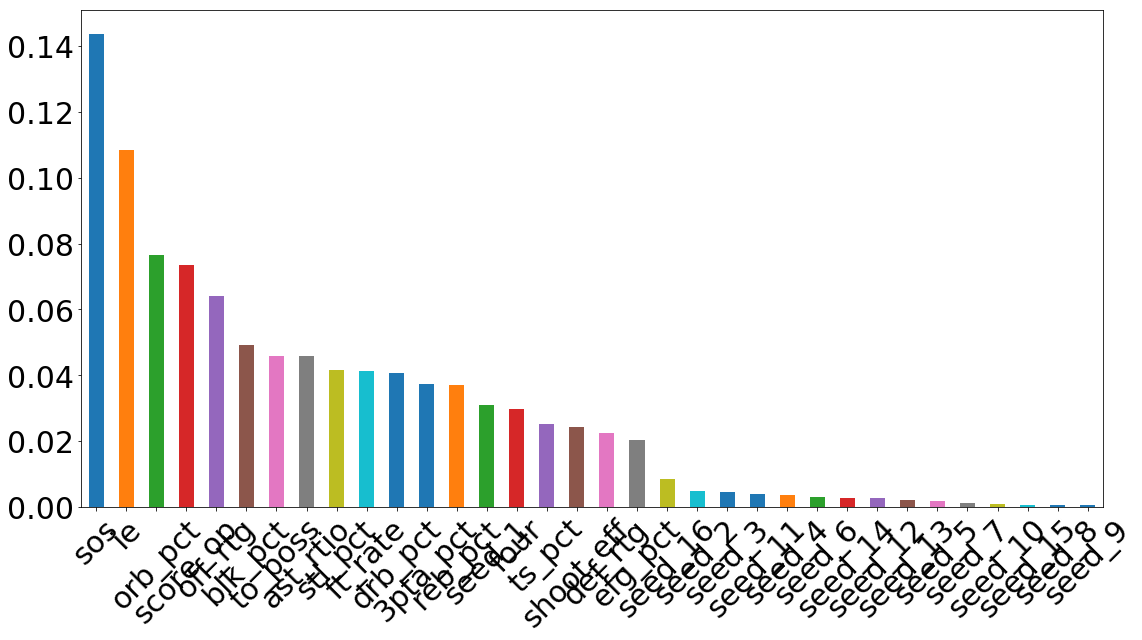

In [52]:
feature_value_names = X.columns
f_importances = pd.Series(best_score_param_estimators[4][2].named_steps['clf'].feature_importances_, feature_value_names)

f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

In [53]:
rf_feature_imp=best_score_param_estimators[4][2].named_steps['clf']

In [54]:
from sklearn.feature_selection import SelectFromModel
feat_selection = SelectFromModel(rf_feature_imp, threshold=0.02)


In [55]:
pipe_fs_clfs = {}

for name, clf in clfs.items():
    # Implement me
    pipe_fs_clfs[name] = Pipeline(steps=[('StandardScaler',StandardScaler()),('SelectFromModel',feat_selection),('clf',clf)])
    

In [56]:
best_score_fs_param_estimators = []

# For each classifier
for name in pipe_fs_clfs.keys():
    # GridSearchCV
    # Implement me
    gs_fs = GridSearchCV(estimator=pipe_fs_clfs[name],
                      param_grid=param_grids[name],
                      #scoring='neg_log_loss',
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline
    # Implement me
    print(pipe_clfs[name])
    print(param_grids[name])
    gs_fs = gs_fs.fit(X_train,y_train)
    
    #Update best_score_param_estimators
    best_score_fs_param_estimators.append([gs_fs.best_score_, gs_fs.best_params_, gs_fs.best_estimator_])
    

Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])
[{'clf__multi_class': ['ovr'], 'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}, {'clf__multi_class': ['multinomial'], 'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}]
Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning

In [57]:
# Sort best_score_param_estimators in descending order of the best_score_
# Implement me
best_score_fs_param_estimators = sorted(best_score_fs_param_estimators,key=lambda x: x[0],reverse=True)

# For each [best_score_, best_params_, best_estimator_]
for best_score_fs_param_estimator in best_score_fs_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_fs_param_estimator[0], best_score_fs_param_estimator[1], type(best_score_fs_param_estimator[2].named_steps['clf'])], end='\n\n')
    

[0.7602283539486203, {'clf__C': 200, 'clf__gamma': 'auto', 'clf__kernel': 'poly'}, <class 'sklearn.svm.classes.SVC'>]

[0.681255946717412, {'clf__activation': 'tanh', 'clf__hidden_layer_sizes': 200}, <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>]

[0.6622264509990485, {'clf__C': 0.001, 'clf__multi_class': 'ovr', 'clf__solver': 'newton-cg'}, <class 'sklearn.linear_model.logistic.LogisticRegression'>]

[0.6489058039961941, {'clf__min_samples_leaf': 10, 'clf__min_samples_split': 2, 'clf__n_estimators': 30}, <class 'sklearn.ensemble.forest.RandomForestClassifier'>]

[0.6460513796384396, {'clf__var_smoothing': 1e-10}, <class 'sklearn.naive_bayes.GaussianNB'>]

[0.6194100856327307, {'clf__min_samples_leaf': 30, 'clf__min_samples_split': 2}, <class 'sklearn.tree.tree.DecisionTreeClassifier'>]

[0.6089438629876308, {'clf__n_neighbors': 10}, <class 'sklearn.neighbors.classification.KNeighborsClassifier'>]



In [58]:
best_score_fs_param_estimators[0][2].score(X_test, y_test)

0.7300380228136882

In [59]:
y_pred_fs = best_score_fs_param_estimators[0][2].predict(X_test)

In [60]:
a=0
for i in range(len(y_pred_fs)):
    if (y_truth[i]==y_pred_fs[i]):
        a+=1;
print("Test Accuracy:", a/len(y_pred_fs))

Test Accuracy: 0.7300380228136882


# Conclusions 2
we improve the score from 0.63 to 0.7.

In [61]:
from sklearn.metrics import confusion_matrix
confusion_mtrx = confusion_matrix(y_test, y_pred_fs)
   

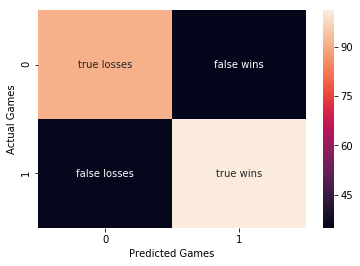

In [62]:
labels = np.array([['true losses','false wins'], ['false losses','true wins']])
sns.heatmap(confusion_mtrx, annot=labels, fmt='')
plt.xlabel('Predicted Games')
plt.ylabel('Actual Games');